In [1]:
using DataFrames
using Plots
import CSV

include("src/CHMM.jl")

chmm_em! (generic function with 1 method)

{S}, Base.Nullable

In [2]:
data_path = "data/toy_data"

{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\Users\Hamza El-Saawy\.julia\v0.6\NullableArrays\src\operators.jl:99.

"data/toy_data"

AsyncCondition instead.
  likely near C:\Users\Hamza El-Saawy\Documents\sisl\code\src\CHMM.jl:5
  likely near C:\Users\Hamza El-Saawy\Documents\sisl\code\src\CHMM.jl:5


In [3]:
trajptr = readcsv(joinpath(data_path, "traj_ptr.csv"), Int) |> vec
X, _ = readcsv(joinpath(data_path, "X.csv"), Float64, header=true)
X = X'
pairsfull, _ = readcsv(joinpath(data_path, "pairs.csv"), Int, header=true)
pairsfull = pairsfull'
;

In [6]:
n_trajs = length(trajptr) - 1
n_pairs = size(pairsfull, 2)
n_obs = size(X, 2)

1056057

# Plot


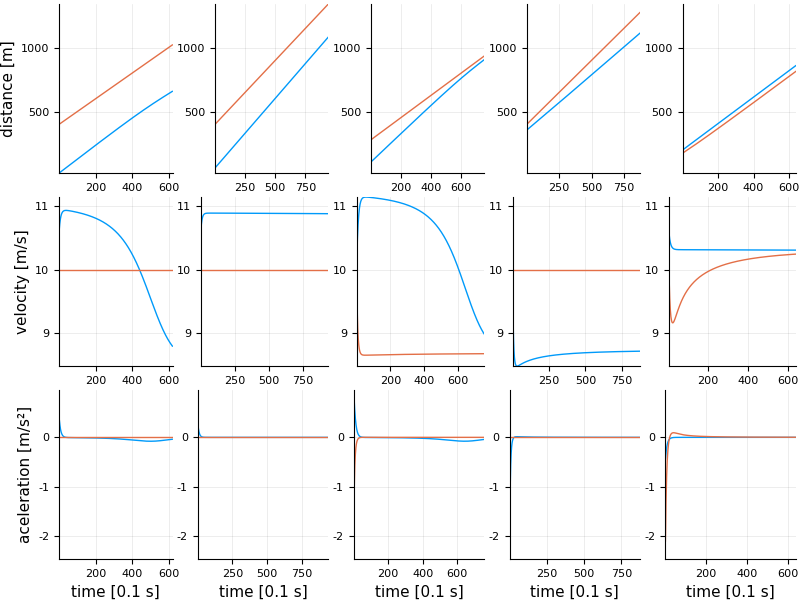

In [33]:
n_plot = 5
pairs_to_plot = randperm(n_pairs)[1:n_plot]
plts = Matrix{Any}(n_plot, 3)

for (i, p) in enumerate(pairs_to_plot)
    X1, X2 = get_pair_from_ptr(X, pairsfull, p)
    plts[i, 1] = plot([X1[1, :] X2[1, :]],)# xlabel="time [0.1 s]", ylabel="")
    plts[i, 2] = plot([X1[2, :] X2[2, :]],)# xlabel="time [0.1 s]", ylabel="")
    plts[i, 3] = plot([X1[3, :] X2[3, :]],)# xlabel="time [0.1 s]", ylabel=)
end
[xlabel!(plts[i, end], "time [0.1 s]") for i in 1:n_plot]
[ylabel!(plts[1, i], s) for (i, s) in 
        enumerate(["distance [m]", "velocity [m/s]", "aceleration [m/s²]"])]
plot((plts)..., legend=false, layout=(3, n_plot), link=:both, size=(900,600))

# CHMM

In [35]:
K = 5
curr = chmm_from_data(X, K)
orig_est = deepcopy(curr)
suff = ChmmSuffStats(curr)
;

In [ ]:
(curr, loglike_hist) = chmm_em!(curr, suff, X, trajptr, pairsfull; N_iters=250, print_every=10)
;